In [12]:
import pandas as pd
import numpy as np
# Load the ELSA Wave 10 dataset from the data folder
file_path = "../data/wave_10_elsa_data_eul_v4.tab"

elsa = pd.read_csv(file_path, sep="\t", low_memory=False)
elsa.head()

,idauniq,idahhw10,mode,perid,corepartner,cohort,wavejoined,w10indout,w10hhout,w10scout,...,w10nssec8,w10nssec5,w10nssec3,w10soc2000r,w10sic2003r,gor,w10w1lwgt,w10w4lwgt,w10xwgt,w10scwt
0,100012,106459,2,4,0,1,1,11,110,1,...,-3,-3,-3,-3,-3,E12000003,,,,
1,100023,105225,2,3,0,1,1,11,110,1,...,-3,-3,-3,-3,-3,E12000001,,,,
2,100025,113214,2,2,0,1,1,11,110,2,...,-3,-3,-3,-3,-3,E12000009,,,,
3,100026,107031,2,4,0,1,1,11,110,1,...,-3,-3,-3,-3,-3,E12000006,,,,
4,100029,102261,2,4,0,1,1,11,110,2,...,-3,-3,-3,-3,-3,E12000003,,,,


In [13]:
# Select relevant variables to physical attributes.
chosen_vars = [
    "hepsyem", "hepsyde", "hepsyan", "hepsymo", "hepsyma",
    "hepab", "hepab1",
    "hemobwa", "hemobch", "hemobst", "hemobre", "hemobpu", "hemobli", "hemob96",
    "cahpsex",
    "heacta", "heactb", "heactc",
    "mmschs",
    "weight",
    "psceda", "pscedd", "pscede", "pscedf", "pscedg",
    "scorgsp"
]


In [14]:
# If ID column exists, include it:
id_var = "idauniq" if "idauniq" in elsa.columns else None

if id_var:
    cols_to_extract = [id_var] + chosen_vars
else:
    cols_to_extract = chosen_vars

subset_df = elsa[cols_to_extract].copy()
subset_df.head()


,idauniq,hepsyem,hepsyde,hepsyan,hepsymo,hepsyma,hepab,hepab1,hemobwa,hemobch,...,heactb,heactc,mmschs,weight,psceda,pscedd,pscede,pscedf,pscedg,scorgsp
0,100012,-1,-1,-1,-1,-1,-1,-1,0,0,...,1,1,1,69.0,2,1,2,1,1,0
1,100023,0,1,0,1,0,1,-1,0,0,...,1,1,1,81.9,1,1,1,1,1,0
2,100025,-1,-1,-1,-1,-1,-1,-1,0,0,...,1,1,1,69.4,2,1,2,1,2,-1
3,100026,-1,-1,-1,-1,-1,1,-1,0,0,...,4,4,1,92.4,2,1,2,1,2,0
4,100029,0,1,1,0,0,-1,-1,0,0,...,1,1,1,87.0,2,1,2,1,2,-1


In [15]:
missing_codes = [-1, -2, -3, -7, -8, -9]
subset_df = subset_df.replace(missing_codes, pd.NA)

In [16]:
subset_df_raw = elsa[cols_to_extract].copy()  # use BEFORE cleaning negatives

subset_df_raw.isin([-1, -2, -3, -7, -8, -9]).mean().sort_values(ascending=False)

hepab1     0.995388
hepsyde    0.847938
hepsyan    0.847938
hepsymo    0.847938
hepsyma    0.847938
hepsyem    0.847938
hepab      0.652260
mmschs     0.450652
weight     0.409013
scorgsp    0.178943
pscedd     0.067598
pscedf     0.065885
pscedg     0.065094
psceda     0.064567
pscede     0.064435
cahpsex    0.000395
heacta     0.000395
heactb     0.000395
heactc     0.000395
hemobli    0.000264
hemob96    0.000264
hemobpu    0.000264
hemobre    0.000264
hemobst    0.000264
hemobch    0.000264
hemobwa    0.000264
idauniq    0.000000
dtype: float64

In [17]:
neg_codes = [-1, -2, -3, -7, -8, -9]
subset_df_clean = subset_df.replace(neg_codes, np.nan)

In [18]:
cesd_items = ["psceda", "pscedd", "pscede", "pscedf", "pscedg"]

# Ensure they are numeric
subset_df_clean[cesd_items] = subset_df_clean[cesd_items].apply(pd.to_numeric, errors='coerce')

# CES-D total = sum of the 5 binary indicators
subset_df_clean["cesd_total"] = subset_df_clean[cesd_items].sum(axis=1)

In [19]:
mobility_vars = ["hemobwa","hemobch","hemobst","hemobre","hemobpu","hemobli"]

subset_df_clean[mobility_vars] = subset_df_clean[mobility_vars].apply(pd.to_numeric, errors='coerce')

subset_df_clean["mobility_score"] = subset_df_clean[mobility_vars].sum(axis=1)


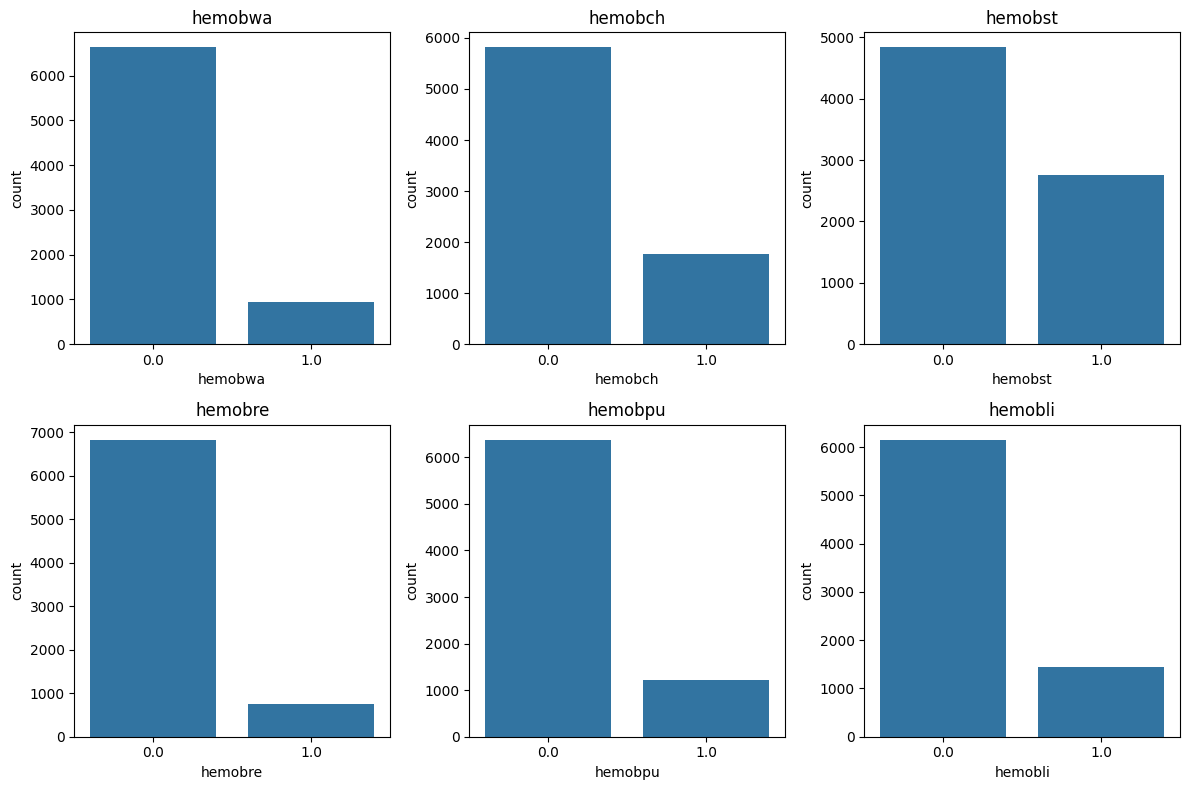

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

mobility_vars = ["hemobwa","hemobch","hemobst","hemobre","hemobpu","hemobli"]

plt.figure(figsize=(12,8))
for i, var in enumerate(mobility_vars, 1):
    plt.subplot(2,3,i)
    sns.countplot(data=subset_df_clean, x=var)
    plt.title(var)
plt.tight_layout()
plt.show()

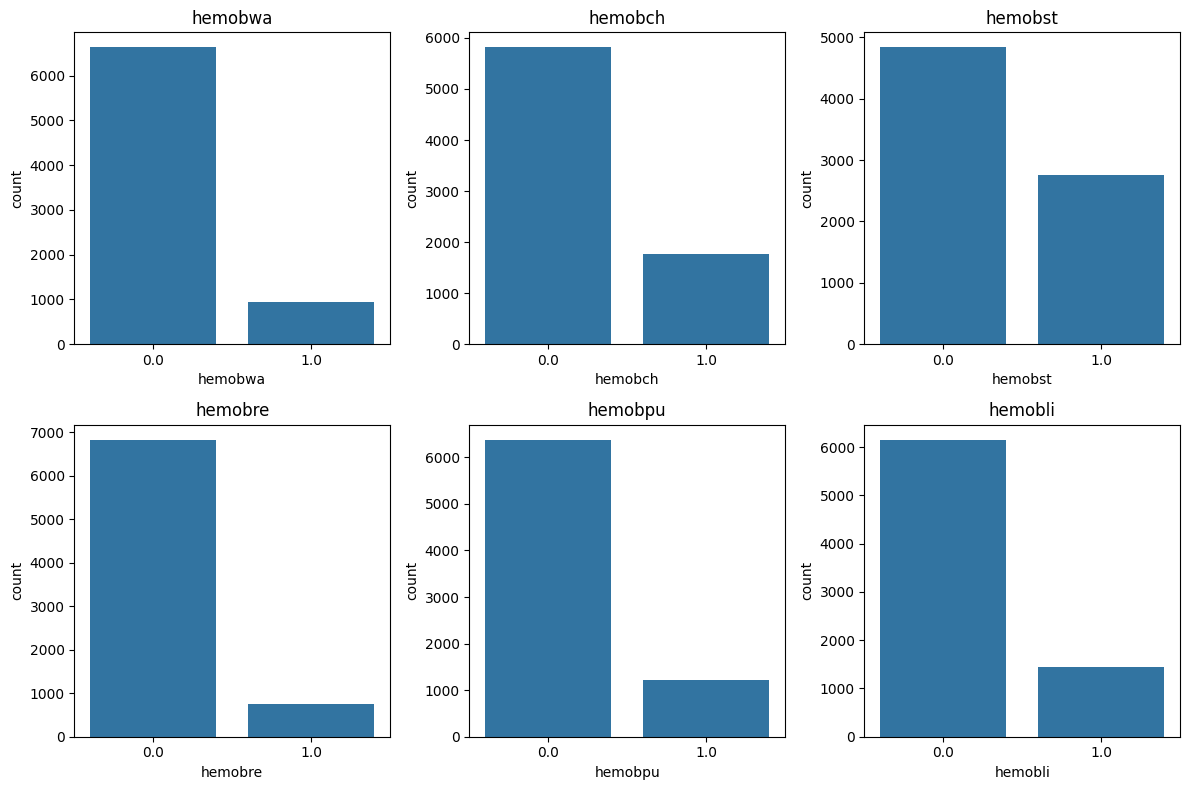

In [21]:
plt.figure(figsize=(12,8))
for i, var in enumerate(mobility_vars, 1):
    plt.subplot(2,3,i)
    sns.countplot(data=subset_df_clean, x=var)
    plt.title(var)
plt.tight_layout()
plt.show()

In [23]:
pd.crosstab(subset_df_clean["heactb"], subset_df_clean["mobility_score"])

mobility_score,0.0,1.0,2.0,3.0,4.0,5.0,6.0
heactb,,,,,,,
1,3089,777,449,210,130,67,34
2,514,197,129,77,45,30,14
3,186,88,60,50,19,20,7
4,329,173,174,166,159,194,199


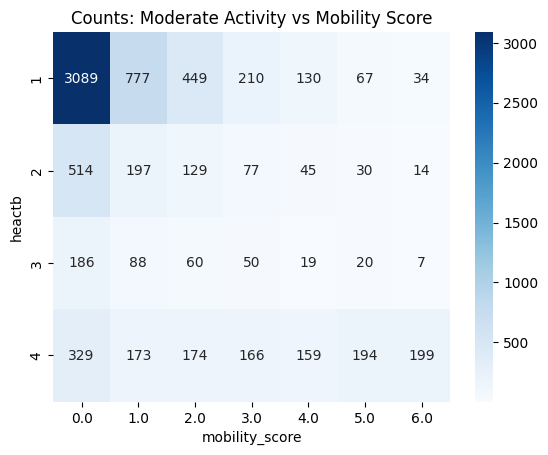

In [24]:
ct = pd.crosstab(subset_df_clean["heactb"], subset_df_clean["mobility_score"])

sns.heatmap(ct, annot=True, fmt="d", cmap="Blues")
plt.title("Counts: Moderate Activity vs Mobility Score")
plt.show()

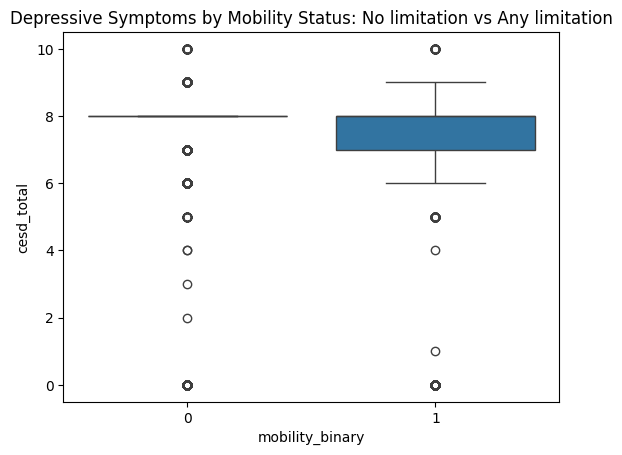

In [26]:
subset_df_clean["mobility_binary"] = (subset_df_clean["mobility_score"] > 0).astype(int)

sns.boxplot(
    data=subset_df_clean,
    x="mobility_binary",
    y="cesd_total"
)
plt.title("Depressive Symptoms by Mobility Status: No limitation vs Any limitation")
plt.show()

In [27]:
import statsmodels.formula.api as smf

model = smf.ols(
    "cesd_total ~ heactb * mobility_score",
    data=subset_df_clean.dropna(subset=["cesd_total","heactb","mobility_score"])
).fit()

model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.3186,0.034,216.713,0.000,7.252,7.385
heactb[T.2],0.0234,0.086,0.272,0.786,-0.145,0.192
heactb[T.3],-0.0887,0.132,-0.672,0.502,-0.347,0.170
heactb[T.4],-0.0206,0.094,-0.220,0.826,-0.204,0.163
mobility_score,0.0320,0.024,1.335,0.182,-0.015,0.079
heactb[T.2]:mobility_score,-0.0957,0.049,-1.937,0.053,-0.192,0.001
heactb[T.3]:mobility_score,0.0168,0.066,0.254,0.800,-0.113,0.147
heactb[T.4]:mobility_score,-0.1884,0.035,-5.434,0.000,-0.256,-0.120


### Modelling

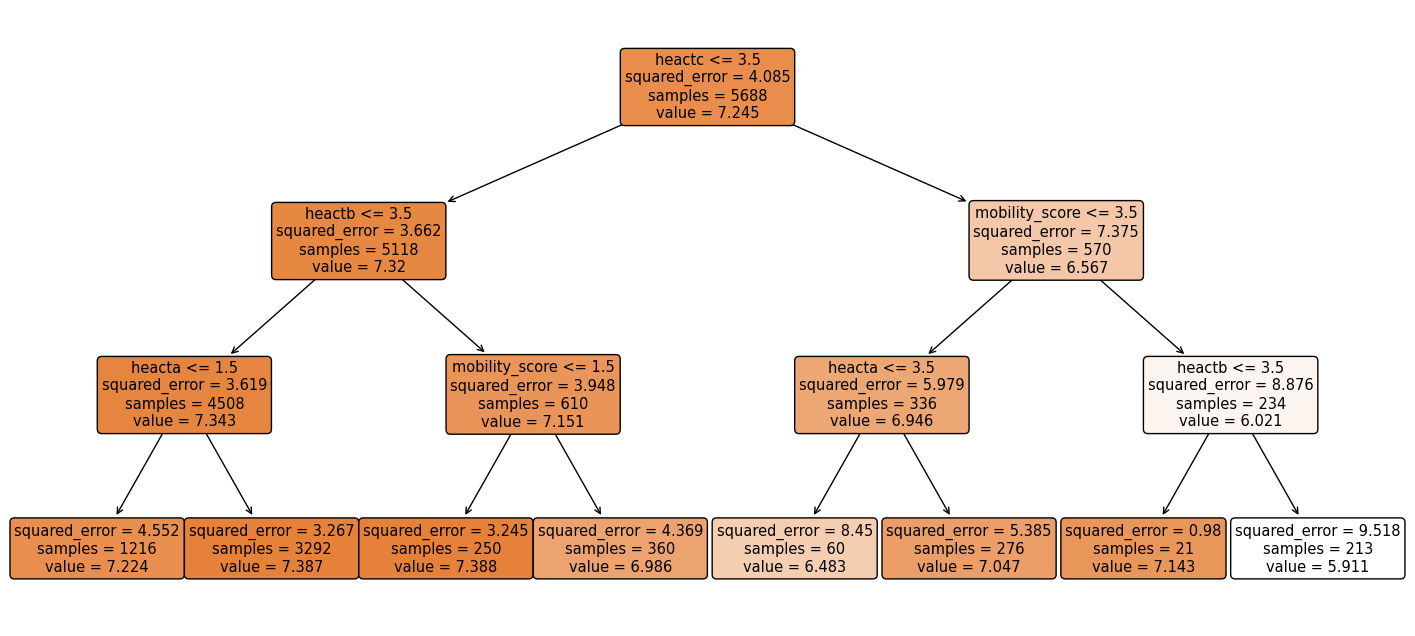

Training R²: 0.022440280516182742
Test R²: 0.01296693629537038


In [28]:
# ---- Decision Tree Baseline Model ---- 
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Select features for modelling
features = ["heacta", "heactb", "heactc", "mobility_score"]
target = "cesd_total"

# Drop rows with missing values in model variables
mod_df = subset_df_clean.dropna(subset=features + [target])

X = mod_df[features]
y = mod_df[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Fit a simple decision tree
tree_model = DecisionTreeRegressor(
    max_depth=3,
    random_state=42
)
tree_model.fit(X_train, y_train)

# Visualize the tree
plt.figure(figsize=(18, 8))
plot_tree(tree_model, feature_names=features, filled=True, rounded=True)
plt.show()

print("Training R²:", tree_model.score(X_train, y_train))
print("Test R²:", tree_model.score(X_test, y_test))


In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Same dataset as the decision tree
features = ["heacta", "heactb", "heactc", "mobility_score"]
target = "cesd_total"

mod_df = subset_df_clean.dropna(subset=features + [target])
X = mod_df[features]
y = mod_df[target]

# Train/test split (same as before for consistency)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Random Forest
rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    min_samples_leaf=50,   # helps reduce overfitting
    random_state=42
)

rf.fit(X_train, y_train)

# Predictions
train_pred = rf.predict(X_train)
test_pred = rf.predict(X_test)

print("Training R²:", r2_score(y_train, train_pred))
print("Test R²:", r2_score(y_test, test_pred))

# Feature importance
importances = pd.Series(rf.feature_importances_, index=features)
importances.sort_values(ascending=False)

Training R²: 0.027352068434991272
Test R²: 0.012686900121773537


heactc            0.417398
mobility_score    0.379771
heactb            0.126466
heacta            0.076364
dtype: float64

## New target variable of help recieved

In [ ]:
def find_vars(df, include, exclude=None, top=None):
    '''
    Use data dictionary to help search for variables based on keywords.
    '''
    include_pat = "|".join([re.escape(k.lower()) for k in include])
    mask = df["label_lower"].str.contains(include_pat, na=False)

    if exclude:
        exclude_pat = "|".join([re.escape(k.lower()) for k in exclude])
        mask = mask & ~df["label_lower"].str.contains(exclude_pat, na=False)

    out = df.loc[mask, ["Variable Name", "Variable Label"]].drop_duplicates()

    if top:
        return out.head(top)
    return out

In [ ]:
# Load data and relabel column names.
dict_path = "../data/5050_wave_10_elsa_data_v4_ukds_data_dictionary.xlsx"
df = pd.read_excel(dict_path, sheet_name="Variable")

# Standardize column names
df.columns = [c.strip() for c in df.columns]
name_col = "Variable Name"
label_col = "Variable Label"

df["label_lower"] = df[label_col].astype(str).str.lower()
df["name_lower"]  = df[name_col].astype(str).str.lower()

df[[name_col, label_col]].head()

,Variable Name,Variable Label
0,idauniq,Cross-wave identifier
1,idahhw10,Wave 10 household identifier
2,mode,Interview Mode
3,perid,Person Number (PersNo)
4,corepartner,Whether a Cohort Member or Partner


In [ ]:
import re
# searching for target variable "help recieved"
outcome_include = [
    "help received", "received help", "informal help", "formal help",
    "care", "carer", "caregiver",
    "adl", "iadl", "washing", "dressing", "eating",
    "shopping", "housework", "medication", "managing money",
    "walk across a room", "walking 100 yards"
]

outcome_exclude = [
    "child grid", "sex of helper", "age of child", "person number of helper",
    "how does respondent pay", "amount", "payment", "local authority", "la ",
    "warden", "sheltered"
]

outcome_candidates = find_vars(df, outcome_include, outcome_exclude)
outcome_candidates

,Variable Name,Variable Label
416,difjob,Occupation of father (or main carer) when resp...
476,hedntb1,Difficulties caused by dental condition: diffi...
494,hemedha,Whether taking any prescribed medication for h...
507,hemda1,Stroke: whether taking medication for stroke
610,heiqn,Ability to handle money for shopping compared ...
...,...,...
6410,scshoth,Time spent shopping or running errands yesterd...
6411,scshotm,Time spent shopping or running errands yesterd...
6415,schwy,Whether respondent spent time doing housework ...
6416,schwth,Time spent doing housework or preparing food y...


In [ ]:
# refine search to better find variables needed
help_include = [
    "received help with",
    "informal help received",
    "formal help received",
    "help received:",
    "whether received help"
]

help_exclude = [
    "payment", "amount", "hours", "how much",
    "sex of helper", "age of helper",
    "child grid", "father", "mother",
    "time spent", "yesterday",
    "shopping or running errands",
    "housework yesterday",
    "medication for",
    "dental", "occupation"
]

help_candidates = find_vars(df, help_include, help_exclude)
help_candidates

,Variable Name,Variable Label
658,catka,Whether received help last month: walking 100 ...
659,catkb,Whether received help last month: climbing sev...
660,catkc,Whether received help last month: climbing one...
661,catkd,"Whether received help last month: dressing, in..."
662,catke,Whether received help last month: walking acro...
...,...,...
962,cahfmos6,Formal help received - with managing money (ca...
963,cahfmwc6,Formal help received - with managing money (ca...
964,cahfmot6,Formal help received: with managing money (cat...
965,cahfmir6,Formal help received: with managing money (cat...
